In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import os
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_fourier_z = pd.read_csv(os.path.join(folder_path, "features_fourier_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_fourier_mm = pd.read_csv(os.path.join(folder_path, "features_fourier_all_minmax.csv"))


In [3]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_fourier_z_cl= df_fourier_z.drop(columns=['filename', 'label'])

In [4]:
df_fourier_z_cl

,mean_magnitude,std_magnitude,low_freq_magnitude,high_freq_magnitude
0,-0.675069,-0.789859,-0.897021,-1.099034
1,-0.332674,0.421457,-0.087640,0.128736
2,-0.726203,-1.157138,-0.882415,-0.876548
3,-0.624806,-0.816866,-0.490506,-0.490618
4,-1.317448,-1.644363,-1.428906,-1.326237
...,...,...,...,...
532,0.749086,0.945783,0.887860,0.885922
533,0.989613,0.780056,1.338128,1.304986
534,0.873905,0.820400,0.651903,0.660034
535,0.896289,1.520130,0.721742,1.004862


Una vez el dataset está preparado se procede seguir el objetivo principal de esta parte de la práctica, aplicar el algoritmo de clustering DBSCAN para identificar subgrupos dentro de `ncRNA`
`DBSCAN` es un método basado en criterios locales que se apoya en el concepto de densidad de los puntos.
 * Se consideran clusters aquellas regiones del espacio con una alta densidad de puntos.
 * Las regiones con una baja densidad se podrán corresponder con puntos que no están asociados a la mayoría de los datos.
 
Los parámetros mínimos que utiliza la función `dbscan()` son `eps`y `minPts`. 
* ***Épsilon (eps)***: define el radio dentro del cual se consideran vecinos los puntos, es decir, especifica lo cerca que deben estar los puntos entre sí para ser considerados parte de un cluster. Esto significa que, si la distancia entre dos puntos es menor o igual a este valor de épsilon, estos puntos se consideran vecinos.
* ***Puntos mínimos (minPts)***: Define el número mínimo de vecinos que un punto necesita para ser considerado un punto central de un clúster.

Un punto será central si tiene al menos `minPts`vecinos, y será un punto borde si tiene menos de `minPts`, pero está dentro del `eps` de un punto central. Será ruido cuando no cumpla ninguna de estas condiciones. Al ajustar los parámetros, se busca minimizar el ruido y encontrar un balance entre puntos centrales y de borde, permitiendo identificar un número claro y significativo de clústeres separados.
Para determinar el valor de épsilon , se puede utilizar el gráfico de k-distancias mediantes la función `kNNdistplot()`. Esto calcula el promedio de distancias de los puntos a su k-vecinos más cercanos, se ordenan las distancias de menor a mayor y después se grafica. Donde se encuentre el cambio brusco o codo en la curva será el valor que representa el valor óptimo para `eps`. 
El parámetro `MinPts`se suele fijar en MinPts = d + 1 o MinPts = 2d - 1. Por tanto, se probarán valores de 41 y 79.

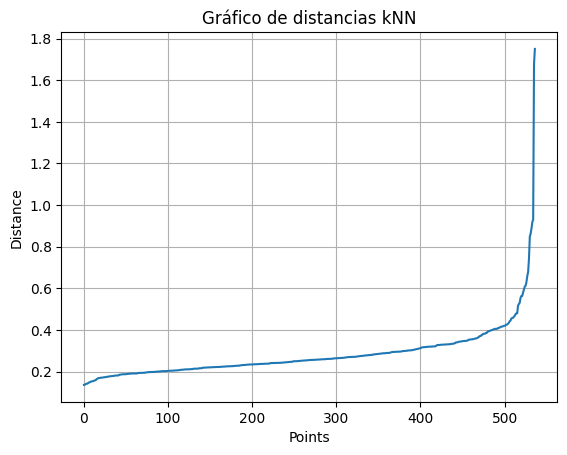

In [5]:
k = 5 #7
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_fourier_z_cl)
distances, indices = neighbors_fit.kneighbors(df_fourier_z_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()


In [6]:
X_fourier_z = np.array(df_fourier_z_cl)

clustering = DBSCAN(eps=0.33, min_samples=10).fit(X_fourier_z)

clustering.labels_

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,  0, -1,  0,  2,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  1,  1,  0,  0,
        1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1, -1,
        0, -1, -1,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1, -1,  0,
        1, -1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0, -1,  0,  1,  1,  1, -1,  1, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  1,  1, -1,  0,  1,  0, -1,  1,  1,  0,  0,  0,  1,
        0,  0,  1,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0,  0,  1,  0,  1,  0,  1,  0, -1, -1, -1,  0,  0, -1,  1,
        0,  1, -1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1, -1,  0,
        0,  0,  0,  0,  1

In [7]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 4
Número de puntos de ruido: 140


In [8]:
y_true = df_fourier_z['label'] 
y_pred = clustering.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN   -1    0    1   2   3
Etiqueta Real                        
higher          103   25  127   0  13
smaller          37  182   45   5   0


In [9]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_fourier_z[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")


Silhouette Score (sin ruido): 0.368


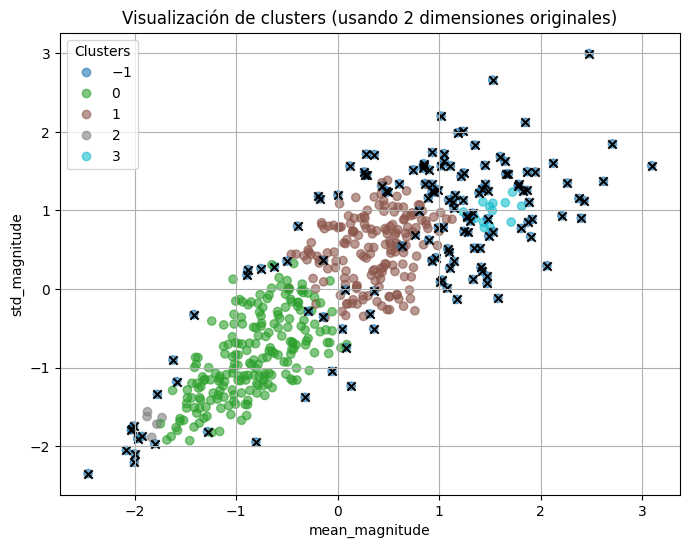

In [10]:
labels = clustering.labels_

# Convertimos a array por si aún está en DataFrame
X = df_fourier_z_cl.values

# Graficamos usando las dos primeras características (columnas 0 y 1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.6)

# Destacar los puntos de ruido (-1)
if -1 in labels:
    plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
                c='black', marker='x', label='Ruido')

plt.title("Visualización de clusters (usando 2 dimensiones originales)")
plt.xlabel(df_fourier_z_cl.columns[0])
plt.ylabel(df_fourier_z_cl.columns[1])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

In [11]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_fourier_mm_cl= df_fourier_mm.drop(columns=['filename', 'label'])

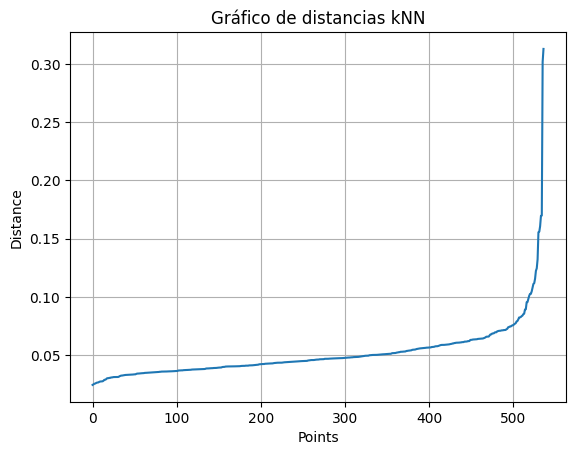

In [12]:
k = 5 #7
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_fourier_mm_cl)
distances, indices = neighbors_fit.kneighbors(df_fourier_mm_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()

In [13]:
X_fourier_mm = np.array(df_fourier_mm_cl)

clustering_mm = DBSCAN(eps=0.063, min_samples=12).fit(X_fourier_mm)

clustering_mm.labels_

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  1,  1,  0,  0,
        1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,
        0, -1, -1,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1, -1,  0,
        1, -1,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0, -1,  0,  1,  1,  1, -1,  1, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  1,  1, -1,  0,  1,  0, -1,  1, -1,  0,  0,  0,  1,
        0,  0,  1,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0,  0,  1,  0,  1,  0,  1,  0, -1, -1, -1,  0,  0, -1,  1,
        0,  1, -1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  1

In [14]:
labels = clustering_mm.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 4
Número de puntos de ruido: 124


In [15]:
y_true = df_fourier_mm['label'] 
y_pred = clustering_mm.labels_     

contingency_table_mm = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_mm)

Cluster DBSCAN  -1    0    1   2   3
Etiqueta Real                       
higher          90   26  128  15   9
smaller         34  190   45   0   0


In [16]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_fourier_mm[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")

Silhouette Score (sin ruido): 0.418


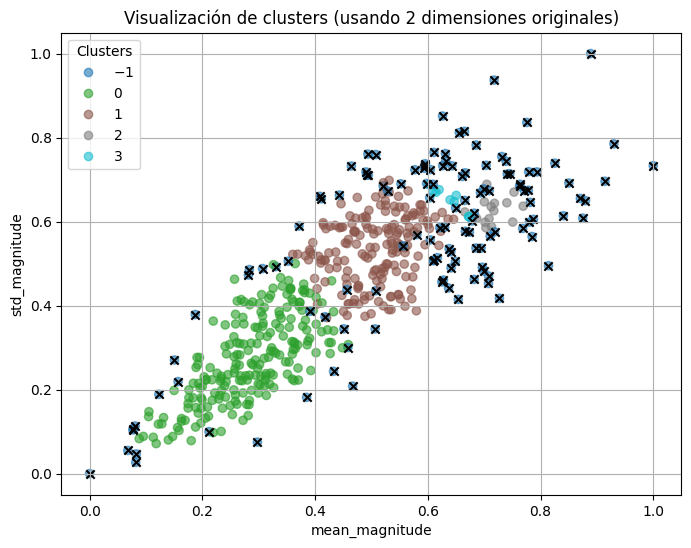

In [17]:

labels = clustering_mm.labels_

# Convertimos a array por si aún está en DataFrame
X = df_fourier_mm_cl.values

# Graficamos usando las dos primeras características (columnas 0 y 1)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.6)

# Destacar los puntos de ruido (-1)
if -1 in labels:
    plt.scatter(X[labels == -1, 0], X[labels == -1, 1],
                c='black', marker='x', label='Ruido')

plt.title("Visualización de clusters (usando 2 dimensiones originales)")
plt.xlabel(df_fourier_mm_cl.columns[0])
plt.ylabel(df_fourier_mm_cl.columns[1])
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()

aplicar umap 

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_16820\3284517211.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_zscore[:, 0], X_umap_zscore[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


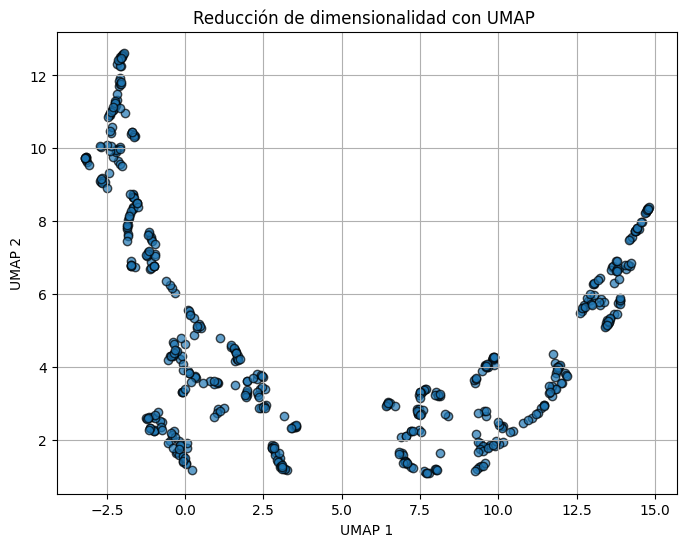

In [18]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_zscore = umap.UMAP(n_neighbors= 10, n_components=2,min_dist=0.01, random_state=42)  
X_umap_zscore = umap_model_zscore.fit_transform(X_fourier_z)


# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_zscore[:, 0], X_umap_zscore[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [19]:
clustering_umap_z = DBSCAN(eps=3, min_samples=10, metric= 'manhattan').fit(X_umap_zscore)
clustering_umap_z.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [20]:
labels = clustering_umap_z.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 0


In [21]:
y_true = df_fourier_z['label'] 
y_pred = clustering_umap_z.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1
Etiqueta Real           
higher           25  243
smaller         206   63


In [22]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_zscore[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")


Silhouette Score (sin ruido): 0.612


umap minmax

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_16820\1924853044.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


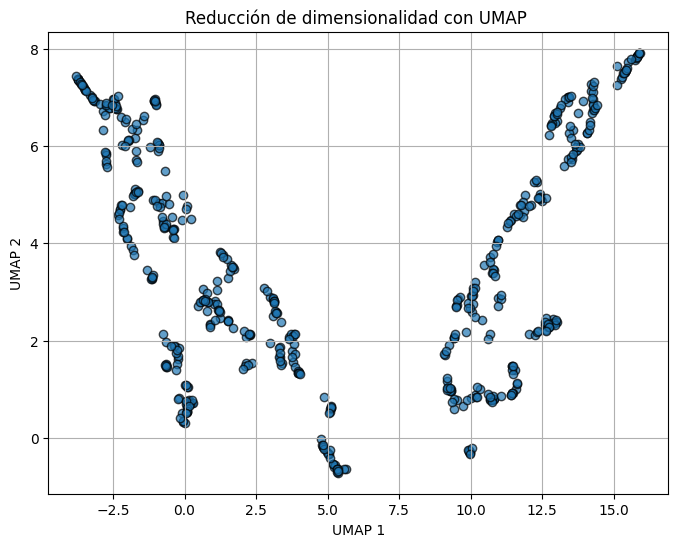

In [28]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_mm = umap.UMAP(n_neighbors= 10, n_components=2,min_dist=0.01, random_state=42)  
X_umap_mm = umap_model_mm.fit_transform(X_fourier_mm)


# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [29]:
clustering_umap_mm = DBSCAN(eps=3, min_samples=10, metric= 'manhattan').fit(X_umap_mm)
clustering_umap_mm.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [30]:
y_true = df_fourier_mm['label'] 
y_pred = clustering_umap_mm.labels_     

contingency_table_mm = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_mm)

Cluster DBSCAN    0    1
Etiqueta Real           
higher           25  243
smaller         206   63


In [31]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_mm[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")


Silhouette Score (sin ruido): 0.655
